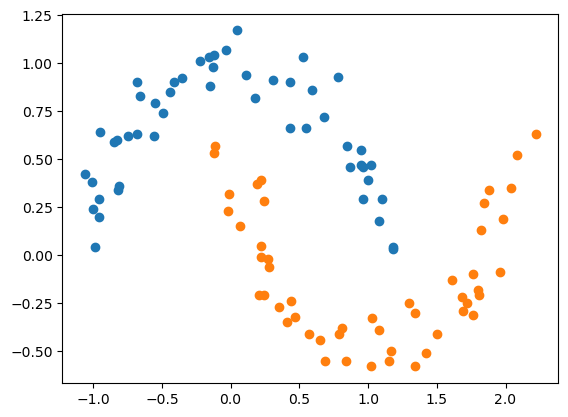

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F

# Número de pontos em cada classe
nc = 50
data = torch.from_numpy(np.loadtxt('../data/moon_data.txt')).to(torch.float32)

inputs = data[:,:2]
targets = data[:,2]

plt.scatter(inputs[targets==0,0], inputs[targets==0,1])
plt.scatter(inputs[targets==1,0], inputs[targets==1,1])

d:\Programs\miniconda3\envs\visao\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


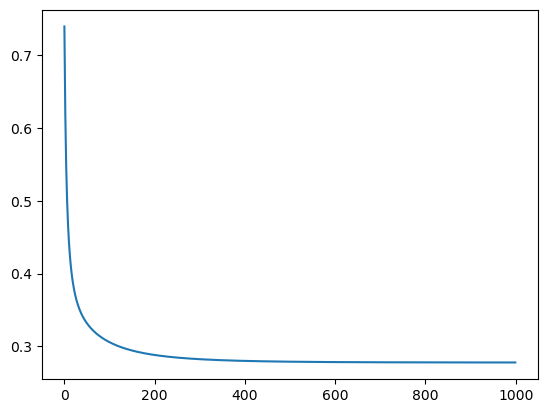

In [2]:
def train(model, inputs, targets, loss_func, num_epochs=1000, lr=0.5):

    # Temos duas variáveis, então redimensionamos a antrada para Nx2
    inputs = inputs.reshape(len(inputs),2)
    targets = targets.reshape(len(targets),1)

    optim = torch.optim.SGD(model.parameters(), lr=lr)
    losses = []
    for epoch in range(0, num_epochs):
        optim.zero_grad()
        scores = model(inputs)
        loss = loss_func(scores, targets)
        loss.backward()
        optim.step()
        losses.append(loss.item())
    
    return losses

model = nn.Linear(in_features=2, out_features=1)
loss_func = nn.BCEWithLogitsLoss()

losses = train(model, inputs, targets, loss_func)

plt.plot(losses)

In [3]:
!pip install fillplots

  Using cached fillplots-0.0.2.tar.gz (11 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [14 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\letic\AppData\Local\Temp\pip-install-7iy88nms\fillplots_aed527a161e740e5a36feab54c38ae3e\setup.py", line 3, in <module>
          import fillplots
        File "C:\Users\letic\AppData\Local\Temp\pip-install-7iy88nms\fillplots_aed527a161e740e5a36feab54c38ae3e\fillplots\__init__.py", line 50, in <module>
          from .api import *
        File "C:\Users\letic\AppData\Local\Temp\pip-install-7iy88nms\fillplots_aed527a161e740e5a36feab54c38ae3e\fillplots\api.py", line 1, in <module>
          from .core import Config
        File "C:\Users\letic\AppData\Local\Temp\pip-install-7iy88nms\fillplots_aed527a161e740e5a36feab54c38ae3e\fillplots\core.py", line 5, in <module>
          from .uti

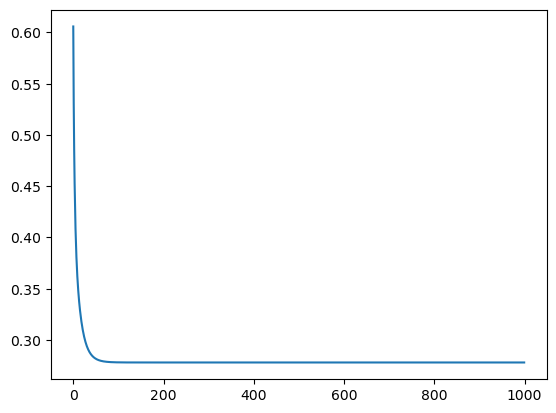

In [7]:

import matplotlib.pyplot as plt

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.layer2 = nn.Linear(in_features=16, out_features=1)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)

        return x
    
model = Model()

losses = train(model, inputs, targets, loss_func)

plt.plot(losses)